In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import GridSearchCV
data =pd.read_csv('data.csv')

In [45]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 14 columns):
age         305 non-null int64
sex         304 non-null float64
cp          305 non-null int64
trestbps    304 non-null float64
chol        300 non-null float64
fbs         303 non-null float64
restecg     305 non-null int64
thalach     304 non-null float64
exang       305 non-null int64
oldpeak     298 non-null float64
slope       305 non-null int64
ca          305 non-null int64
thal        305 non-null int64
target      305 non-null int64
dtypes: float64(6), int64(8)
memory usage: 33.5 KB


In [46]:
data.isna().sum()

age         0
sex         1
cp          0
trestbps    1
chol        5
fbs         2
restecg     0
thalach     1
exang       0
oldpeak     7
slope       0
ca          0
thal        0
target      0
dtype: int64

In [47]:
data.dropna(axis=0 , inplace=True)

In [48]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

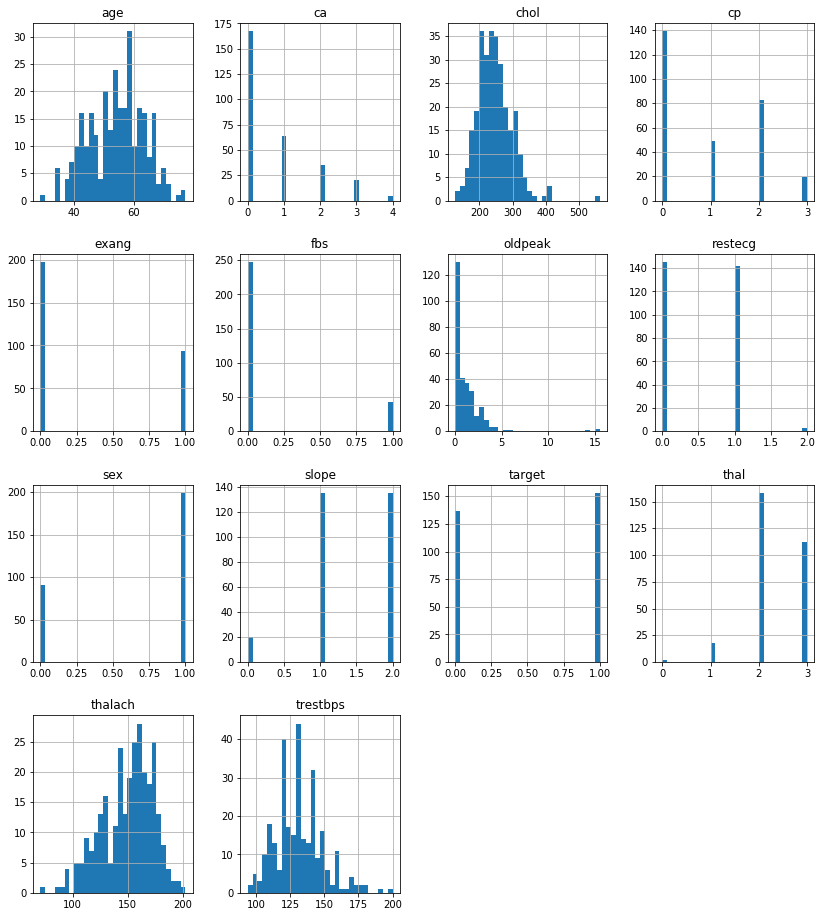

In [49]:
data.hist(bins=30 , figsize=(14,16))
plt.show()

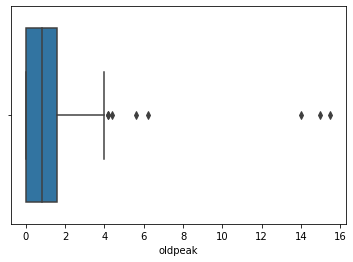

In [50]:
sns.boxplot(x=data['oldpeak'])

In [51]:
i = data[((data.oldpeak >= 6 ))].index

In [52]:
data.drop(i, inplace=True)

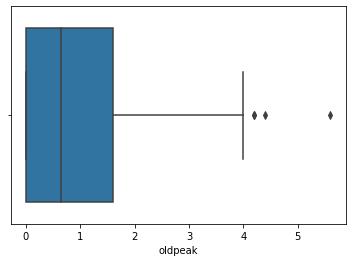

In [53]:
sns.boxplot(x=data['oldpeak'])

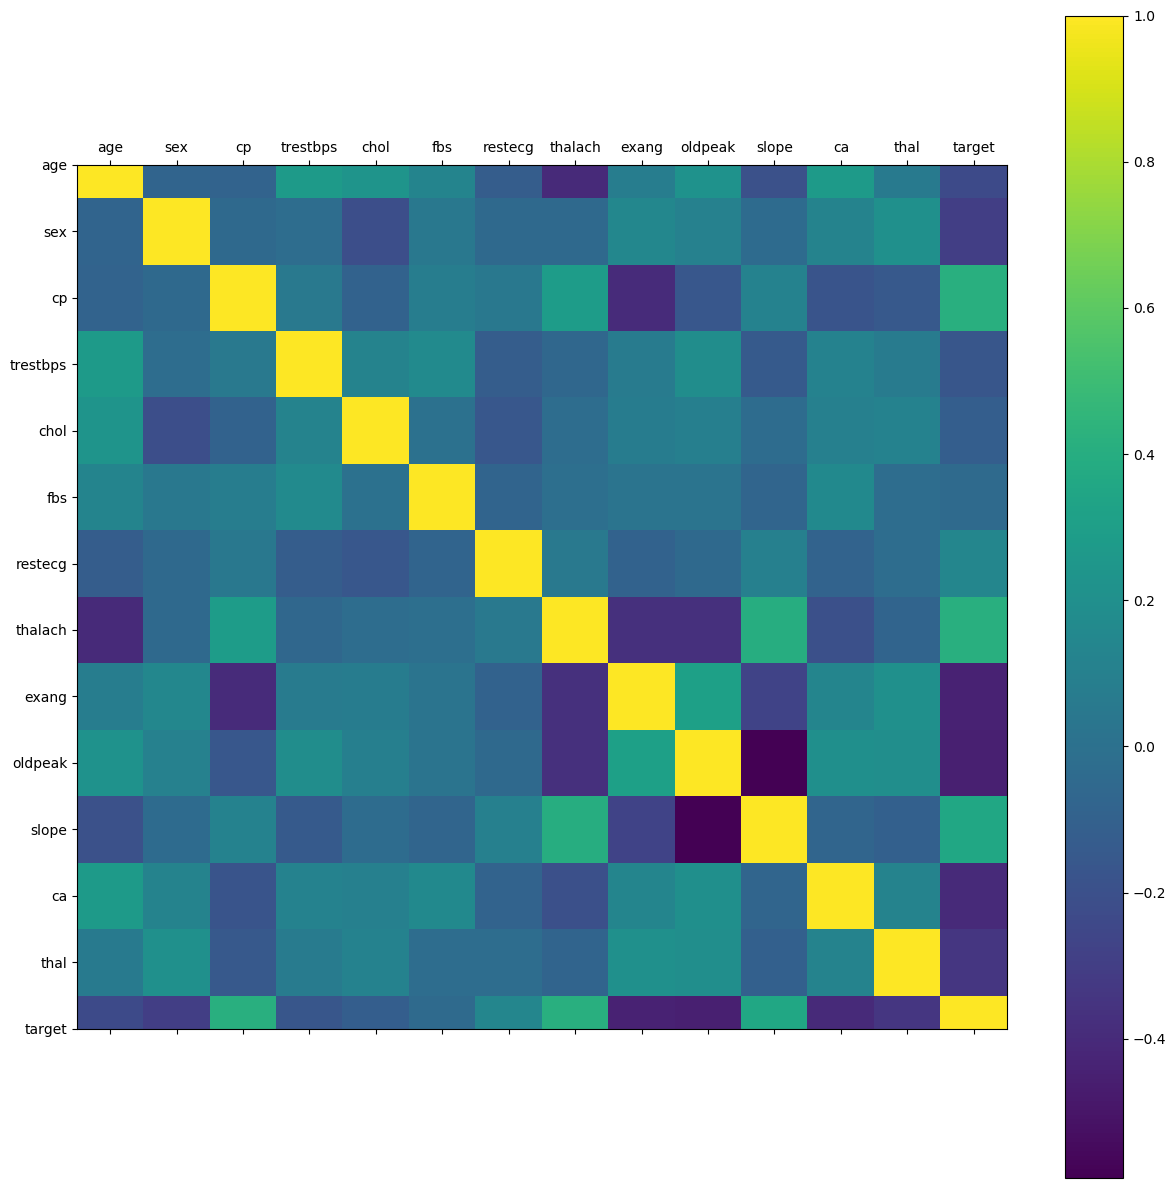

In [54]:
rcParams['figure.figsize'] = 10,15
rcParams["figure.dpi"]= 100
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

In [55]:
data['target'].unique()


array([1, 0], dtype=int64)

Text(0.5, 1.0, 'Count of each Target Class')

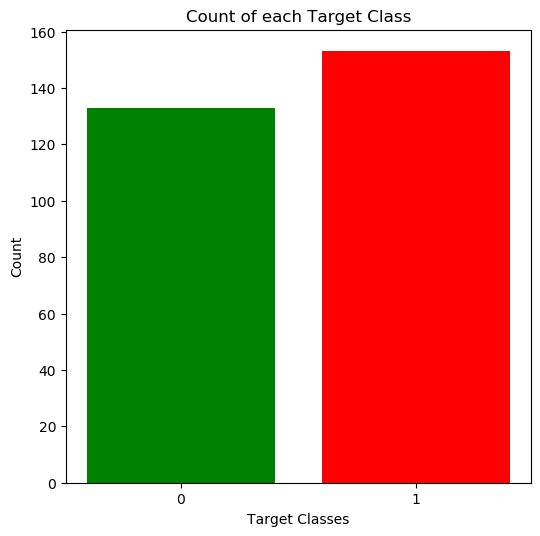

In [56]:
rcParams['figure.figsize'] = 6,6
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [57]:
y = data['target']
X = data.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =4)

In [58]:
Hyper_paramters={'criterion':['gini', 'entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
Tree_Gridsearch_paramters=GridSearchCV(DecisionTreeClassifier(),Hyper_paramters,scoring='roc_auc',n_jobs=-1,cv=10,verbose=1)
Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,y_train)


print ("The best paramter combination is ")
print(Tree_crossvalidation.best_params_) 
Final_Model=Tree_crossvalidation.best_estimator_ 
print("The best AUC score was ")
print(Tree_crossvalidation.best_score_)  
importances=Tree_crossvalidation.best_estimator_.feature_importances_
importances

Names=list(X_train.columns.values)
for f in range(X_train.shape[1]):
    print((Names[f],  importances[[f]]))

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    3.2s


The best paramter combination is 
{'criterion': 'entropy', 'max_depth': 3}
The best AUC score was 
0.8592171717171717
('age', array([0.11634574]))
('sex', array([0.06985759]))
('cp', array([0.39124666]))
('trestbps', array([0.]))
('chol', array([0.]))
('fbs', array([0.]))
('restecg', array([0.]))
('thalach', array([0.]))
('exang', array([0.]))
('oldpeak', array([0.07188304]))
('slope', array([0.]))
('ca', array([0.12029366]))
('thal', array([0.23037331]))


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.6s finished
C:\Users\yasser\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [59]:
y_pred = Final_Model.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
print(classification_report(y_test, y_pred, target_names=["Heart disease", "No Heart Disears"]))

#Calculate sensitivity and specificity

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

[[18  6]
 [ 7 27]]
                  precision    recall  f1-score   support

   Heart disease       0.72      0.75      0.73        24
No Heart Disears       0.82      0.79      0.81        34

        accuracy                           0.78        58
       macro avg       0.77      0.77      0.77        58
    weighted avg       0.78      0.78      0.78        58

Accuracy :  0.7758620689655172
Sensitivity :  0.75
Specificity :  0.7941176470588235


In [60]:
import pickle

In [63]:
pickle.dump(Final_Model , open('model.pkl' , 'wb'))

In [62]:
model=pickle.load(open('model.pkl','rb'))